In [84]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
import matplotlib.pyplot as plt
from random import sample
from folium import TileLayer

In [85]:
data=pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\MSI\AppData\Local\Temp\ipykernel_12620\1965856057.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('NYPD_Complaint_Data_Historic.csv')


In [86]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,25640826H10611,12/05/2006,10:38:00,NaN,(null),NaN,12/05/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,(null),25-44,WHITE HISPANIC,M
1,16631501H8965,08/25/1973,12:15:00,NaN,(null),NaN,05/29/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,(null),45-64,BLACK,F
2,11118212H8714,04/22/2006,16:50:00,NaN,(null),NaN,04/22/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),45-64,BLACK,M
3,23471265H9399,07/20/2006,22:37:00,NaN,(null),NaN,07/20/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),18-24,BLACK,M
4,24565927H10142,04/14/2006,02:37:00,NaN,(null),NaN,04/14/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,(null),45-64,BLACK,M


# *I. Data Cleaning*

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [88]:
data.drop(columns=['HOUSING_PSA'],inplace=True)
data.drop(columns='PATROL_BORO',inplace = True)
data.drop(columns=['KY_CD','RPT_DT','PD_DESC','PD_CD'],inplace=True)

In [89]:
data.drop(columns=['PARKS_NM'],inplace=True)

In [90]:
data.drop(columns=['HADEVELOPT'],inplace=True)

In [91]:
data.drop(columns=['LOC_OF_OCCUR_DESC'],inplace=True)

In [92]:
data.drop(columns=['JURIS_DESC'],inplace=True)

In [93]:
data.drop(columns=['STATION_NAME'],inplace=True)

In [94]:
data.drop(columns=['Lat_Lon'],inplace=True)

In [95]:
data.drop(columns=['JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD'],inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CMPLNT_NUM        object 
 1   CMPLNT_FR_DT      object 
 2   CMPLNT_FR_TM      object 
 3   CMPLNT_TO_DT      object 
 4   CMPLNT_TO_TM      object 
 5   ADDR_PCT_CD       float64
 6   OFNS_DESC         object 
 7   CRM_ATPT_CPTD_CD  object 
 8   LAW_CAT_CD        object 
 9   BORO_NM           object 
 10  PREM_TYP_DESC     object 
 11  SUSP_AGE_GROUP    object 
 12  SUSP_RACE         object 
 13  SUSP_SEX          object 
 14  TRANSIT_DISTRICT  float64
 15  Latitude          float64
 16  Longitude         float64
 17  VIC_AGE_GROUP     object 
 18  VIC_RACE          object 
 19  VIC_SEX           object 
dtypes: float64(4), object(16)
memory usage: 1.3+ GB


# *I.1 Dealing with nulls*

In [97]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)

CMPLNT_NUM           0.000000
CMPLNT_FR_DT         0.007347
CMPLNT_FR_TM         0.000000
CMPLNT_TO_DT        20.403713
CMPLNT_TO_TM         0.000000
ADDR_PCT_CD          0.008649
OFNS_DESC            0.000000
CRM_ATPT_CPTD_CD     0.000000
LAW_CAT_CD           0.000000
BORO_NM              0.000000
PREM_TYP_DESC        0.000000
SUSP_AGE_GROUP       0.000000
SUSP_RACE            0.000000
SUSP_SEX             0.000000
TRANSIT_DISTRICT    97.778479
Latitude             0.005227
Longitude            0.005227
VIC_AGE_GROUP        0.000000
VIC_RACE             0.000000
VIC_SEX              0.000000
dtype: float64


In [98]:
data = data.drop(columns=['TRANSIT_DISTRICT'])

In [99]:
#Drop rows that don't have coordinates
data = data[data['Latitude'].notna()]
data = data[data['Longitude'].notna()]

In [100]:
if all(data['CMPLNT_FR_DT'].notna() == data['CMPLNT_TO_DT'].notna()):
    data.drop(columns='CMPLNT_TO_DT',inplace = True)

In [101]:
data['BORO_NM'] = data['BORO_NM'].fillna('UNKNOWN')

### Cleaning Suspect and victim data

In [102]:
data['SUSP_RACE'] = data['SUSP_RACE'].fillna('UNKNOWN')
data['VIC_RACE'] = data['VIC_RACE'].fillna('UNKNOWN')

data['SUSP_SEX'] = data['SUSP_SEX'].fillna('U')
data['VIC_SEX'] = data['VIC_SEX'].fillna('U')

In [103]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
data.loc[~data['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = 'UNKNOWN'
data.loc[~data['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [104]:
data.dropna(inplace=True)
len(data)

7095113

# *I.2 Creating datetime features*

In [105]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data['CMPLNT_TO_DT'], errors='coerce')
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')

C:\Users\MSI\AppData\Local\Temp\ipykernel_12620\4091237644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
C:\Users\MSI\AppData\Local\Temp\ipykernel_12620\4091237644.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


In [106]:
#drop rows when we don't have a date or a time of the incident
data = data[data['CMPLNT_FR_DT'].notna()]
data = data[data['CMPLNT_FR_TM'].notna()]

In [107]:
# new variables
data['year'] = data['CMPLNT_FR_DT'].dt.year
data['month'] = data['CMPLNT_FR_DT'].dt.month
data['day'] = data['CMPLNT_FR_DT'].dt.day
data['hour'] = data['CMPLNT_FR_TM'].dt.hour
# add week day column
data['weekday'] = pd.to_datetime(data['CMPLNT_FR_DT']).dt.day_name()

In [108]:
# we no more need those columns
data.drop(columns='CMPLNT_FR_DT', inplace=True)
data.drop(columns='CMPLNT_FR_TM', inplace=True)
data.drop(columns='CMPLNT_TO_TM', inplace=True)
data.drop(columns='CMPLNT_TO_DT', inplace=True)

In [109]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
44,46253146,44.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,STREET,18-24,BLACK,M,40.837323,-73.919831,18-24,BLACK,F,2008,5,6,18,Tuesday
92,136656420,94.0,HARRASSMENT 2,COMPLETED,VIOLATION,BROOKLYN,STREET,45-64,WHITE,M,40.728622,-73.948080,45-64,WHITE,F,2014,5,8,11,Thursday
100,153488648,100.0,FELONY ASSAULT,COMPLETED,FELONY,QUEENS,OTHER,25-44,WHITE,M,40.593680,-73.790074,25-44,WHITE,F,2016,5,28,12,Saturday
113,240227623,103.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,STREET,45-64,BLACK,M,40.699795,-73.807364,25-44,BLACK,F,2022,1,21,8,Friday
114,250584670,103.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,STREET,25-44,BLACK,F,40.702567,-73.790554,25-44,BLACK,F,2022,9,3,20,Saturday


## Renaming data columns

In [110]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [111]:
data.LAW_CAT_CD.value_counts()

LAW_CAT_CD
MISDEMEANOR    3888030
FELONY         2300681
VIOLATION       906222
Name: count, dtype: int64

In [112]:
data = data.rename({'LAW_CAT_CD':'CRIME_CLASS'},axis = 1)
data = data.rename({'CRM_ATPT_CPTD_CD':'COMPLETED'},axis = 1)

## Categorizing offense levels

In [113]:
data.OFNS_DESC.value_counts()

OFNS_DESC
PETIT LARCENY                      1298533
HARRASSMENT 2                       891683
ASSAULT 3 & RELATED OFFENSES        727758
CRIMINAL MISCHIEF & RELATED OF      723809
GRAND LARCENY                       659955
                                    ...   
OTHER TRAFFIC INFRACTION                10
ABORTION                                 5
UNDER THE INFLUENCE OF DRUGS             2
KIDNAPPING AND RELATED OFFENSES          2
OFFENSES AGAINST MARRIAGE UNCL           2
Name: count, Length: 72, dtype: int64

In [114]:
# categorize property related offenses
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD', 
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

# categorize sexual offenses
sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

# categorize drugs/alcohol related offenses
drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']

# categorize personal (assault/homicidal/kidnapping/weapon) offenses
personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'UNLAWFUL POSS. WEAP. ON SCHOOL']

# categorize administrative/trespassing/loitering/traffic offenses
admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS', 
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

# categorize remaining offenses as other
other = ['MISCELLANEOUS PENAL LAW', 'OFFENSES AGAINST MARRIAGE UNCL',
         'OTHER STATE LAWS (NON PENAL LAW)', 'FORTUNE TELLING',
         'NYS LAWS-UNCLASSIFIED VIOLATION', 'LOITERING/GAMBLING (CARDS, DIC',
         'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
         'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
         'NYS LAWS-UNCLASSIFIED FELONY', 'UNAUTHORIZED USE OF A VEHICLE', 'OTHER']


In [115]:
conditions = [
    data['OFNS_DESC'].isin(prop),
    data['OFNS_DESC'].isin(sexual),
    data['OFNS_DESC'].isin(drug_alch),
    data['OFNS_DESC'].isin(personal),
    data['OFNS_DESC'].isin(admin)
]

categories = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']

# Use np.select to create the 'OFNS_CATS' column
data['OFNS_DESC'] = np.select(conditions, categories, default='OTHER')

In [116]:
data['OFNS_DESC'].unique()

array(['SEXUAL', 'PERSONAL', 'ADMINISTRATIVE', 'PROPERTY',
       'DRUGS/ALCOHOL', 'OTHER'], dtype=object)

# Organizing data

In [117]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'OFNS_DESC', 'COMPLETED', 'CRIME_CLASS',
       'BORO_NM', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [118]:
column_titles = ['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'ADDR_PCT_CD', 'OFNS_DESC', 'COMPLETED', 'CRIME_CLASS',
       'BORO_NM', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
data = data.reindex(columns = column_titles)

In [119]:
data.columns

Index(['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'ADDR_PCT_CD',
       'OFNS_DESC', 'COMPLETED', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [120]:
data['ADDR_PCT_CD'].unique()

array([ 44.,  94., 100., 103., 122., 120., 123.,  41.,  76.,   9., 105.,
        47., 114.,  19.,  45.,   6.,  25.,  28.,  68.,  72.,   1.,  62.,
        10.,   5.,  60.,  66.,  18.,  13.,  84.,  78.,  14.,   7.,  20.,
        17.,  88.,  61.,  24.,  70.,  77.,  22.,  90.,  26.,  71.,  79.,
        30., 108.,  75.,  67.,  23.,  33., 111.,  32.,  63., 110.,  34.,
        81.,  83.,  73., 109.,  40.,  46., 104.,  69.,  50.,  42.,  52.,
        48., 115.,  43.,  49., 112., 102., 106., 107., 113., 101., 121.])

In [121]:
data['OFNS_DESC'].unique()

array(['SEXUAL', 'PERSONAL', 'ADMINISTRATIVE', 'PROPERTY',
       'DRUGS/ALCOHOL', 'OTHER'], dtype=object)

In [122]:
data['COMPLETED'].unique()

array(['COMPLETED', 'ATTEMPTED', '(null)'], dtype=object)

In [123]:
print(data['COMPLETED'].unique().tolist())


['COMPLETED', 'ATTEMPTED', '(null)']


In [124]:
data = data[data['COMPLETED'] != '(null)']

In [125]:
data.COMPLETED.value_counts()

COMPLETED
COMPLETED    6974623
ATTEMPTED     120244
Name: count, dtype: int64

In [126]:
data['CRIME_CLASS'].unique()

array(['VIOLATION', 'FELONY', 'MISDEMEANOR'], dtype=object)

In [127]:
data['BORO_NM'].unique()

array(['BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN',
       '(null)'], dtype=object)

In [128]:
data = data[data['BORO_NM'] != '(null)']

In [129]:
data['PREM_TYP_DESC'].unique()

array(['STREET', 'OTHER', 'FAST FOOD', 'RESIDENCE - APT. HOUSE',
       'RESIDENCE-HOUSE', 'DRY CLEANER/LAUNDRY',
       'PRIVATE/PAROCHIAL SCHOOL', 'CHECK CASHING BUSINESS',
       'CHAIN STORE', 'PARKING LOT/GARAGE (PUBLIC)', 'DEPARTMENT STORE',
       'PARKING LOT/GARAGE (PRIVATE)', 'COMMERCIAL BUILDING', 'CHURCH',
       'DRUG STORE', 'CLOTHING/BOUTIQUE', 'RESTAURANT/DINER',
       'SMALL MERCHANT', 'OPEN AREAS (OPEN LOTS)', 'STORAGE FACILITY',
       'LIQUOR STORE', 'BAR/NIGHT CLUB', 'PUBLIC SCHOOL', 'GAS STATION',
       'RESIDENCE - PUBLIC HOUSING', 'GROCERY/BODEGA', 'TELECOMM. STORE',
       'FOOD SUPERMARKET', '(null)', 'CEMETERY', 'BUS (NYC TRANSIT)',
       'HIGHWAY/PARKWAY', 'DOCTOR/DENTIST OFFICE', 'GYM/FITNESS FACILITY',
       'TRANSIT FACILITY (OTHER)', 'TUNNEL', 'VARIETY STORE', 'BUS STOP',
       'STORE UNCLASSIFIED', 'PARK/PLAYGROUND', 'HOTEL/MOTEL', 'BANK',
       'PUBLIC BUILDING', 'FACTORY/WAREHOUSE', 'BUS TERMINAL',
       'MARINA/PIER', 'ABANDONED BUILDING', 'SO

In [130]:
data = data[data['PREM_TYP_DESC'] != '(null)']

In [131]:
data['SUSP_AGE_GROUP'].unique()

array(['18-24', '45-64', '25-44', 'UNKNOWN', '<18', '65+'], dtype=object)

In [132]:
data['SUSP_RACE'].unique()

array(['BLACK', 'WHITE', '(null)', 'UNKNOWN', 'WHITE HISPANIC',
       'AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'OTHER'], dtype=object)

In [133]:
data['SUSP_RACE'] = data['SUSP_RACE'].replace('(null)', 'UNKNOWN')
data['SUSP_RACE'].unique()


array(['BLACK', 'WHITE', 'UNKNOWN', 'WHITE HISPANIC',
       'AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'OTHER'], dtype=object)

In [134]:
data['SUSP_SEX'].unique()

array(['M', 'F', '(null)', 'U'], dtype=object)

In [135]:
data['SUSP_SEX'] = data['SUSP_SEX'].replace('(null)', 'U')
print(data['SUSP_SEX'].unique())


['M' 'F' 'U']


In [136]:
data['VIC_AGE_GROUP'].unique()

array(['18-24', '45-64', '25-44', 'UNKNOWN', '<18', '65+'], dtype=object)

In [137]:
data['VIC_RACE'].unique()

array(['BLACK', 'WHITE', 'UNKNOWN', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER', '(null)'], dtype=object)

In [138]:
data['VIC_RACE'] = data['VIC_RACE'].replace('(null)', 'UNKNOWN')
data['VIC_RACE'].unique()

array(['BLACK', 'WHITE', 'UNKNOWN', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER'], dtype=object)

In [139]:
data['VIC_SEX'].unique()

array(['F', 'M', 'E', 'D', '(null)', 'L'], dtype=object)

In [140]:
data['VIC_SEX'] = data['VIC_SEX'].replace('(null)', 'U')
print(data['VIC_SEX'].unique())

['F' 'M' 'E' 'D' 'U' 'L']


# II. Exploratory Data Analysis

### Victms data

C:\Users\MSI\AppData\Local\Temp\ipykernel_12620\2228590500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);


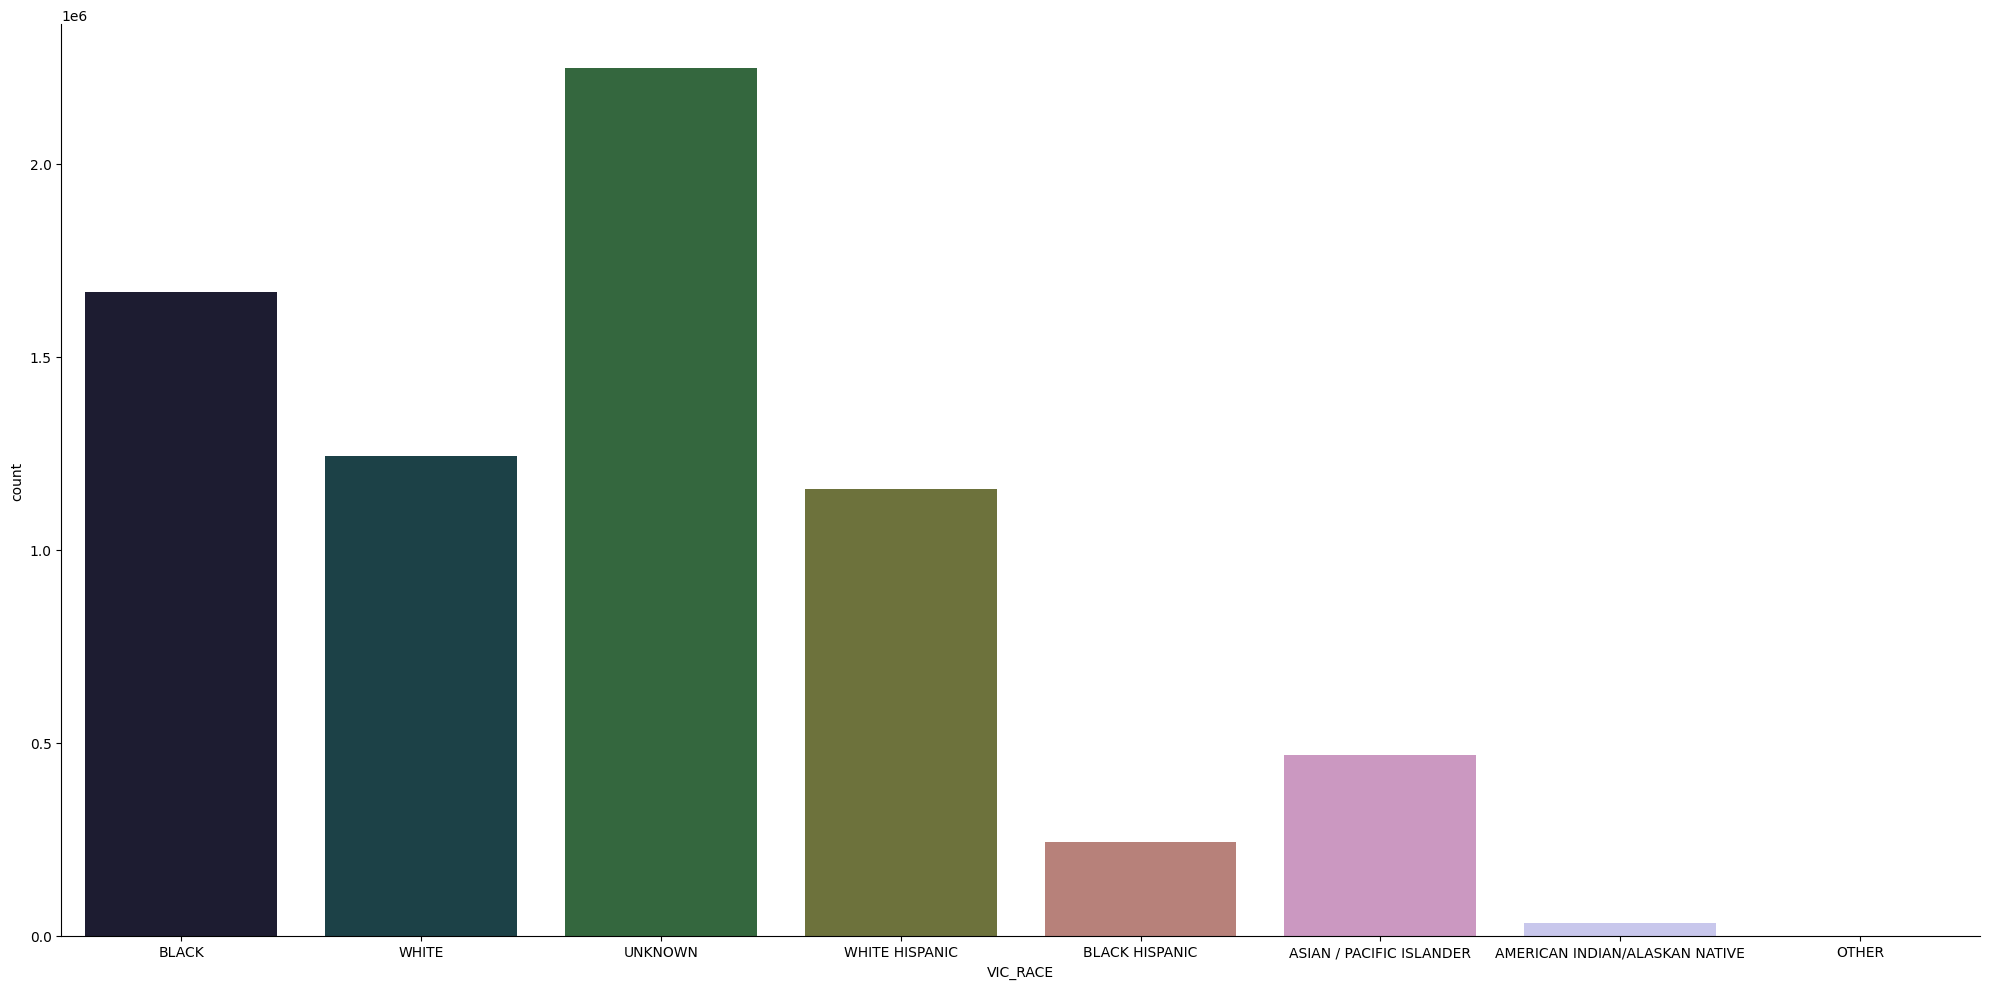

In [141]:
sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);

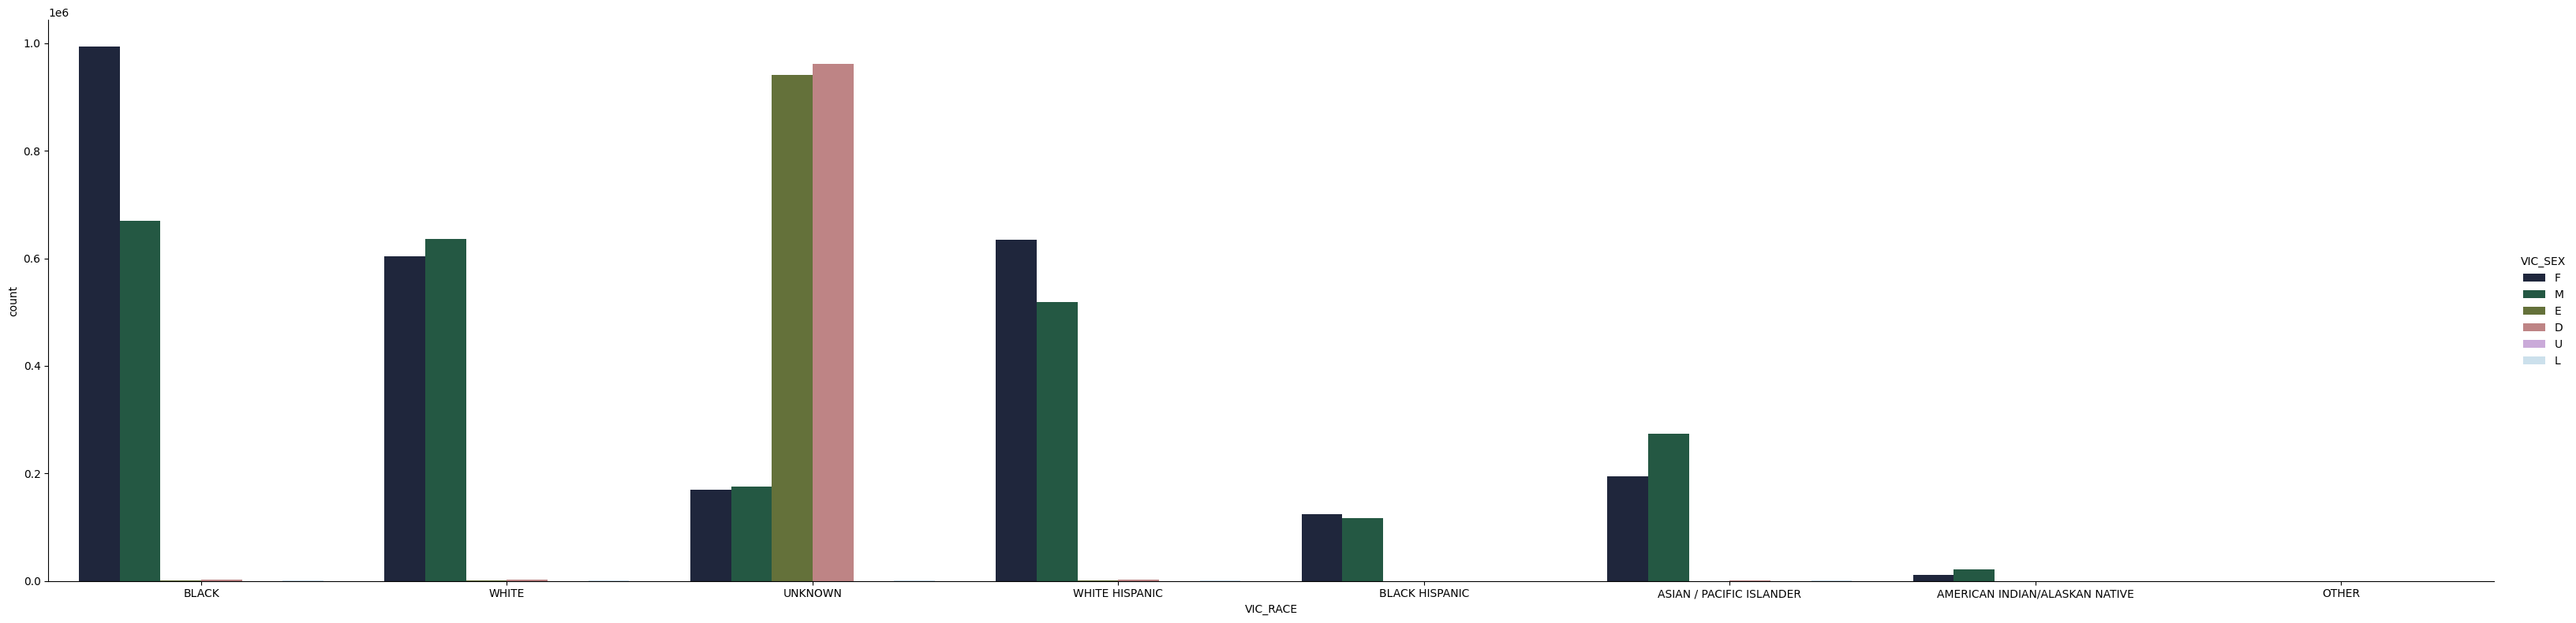

In [142]:
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=data, height=8, aspect=4)

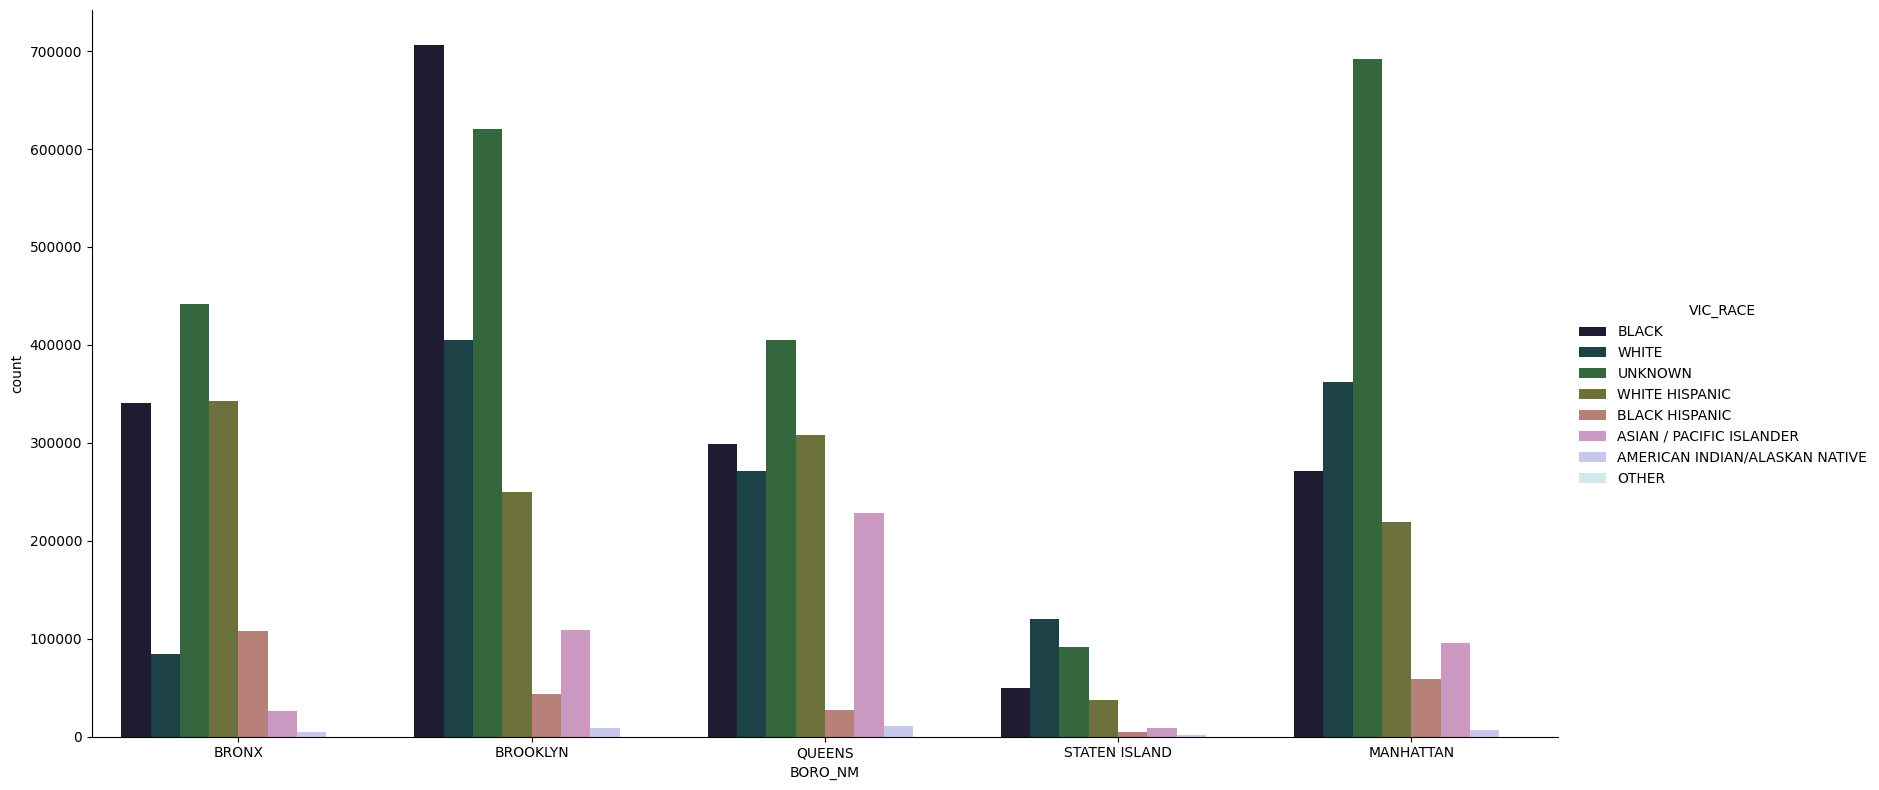

In [143]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=data, height=8, aspect = 2)

### Suspects data

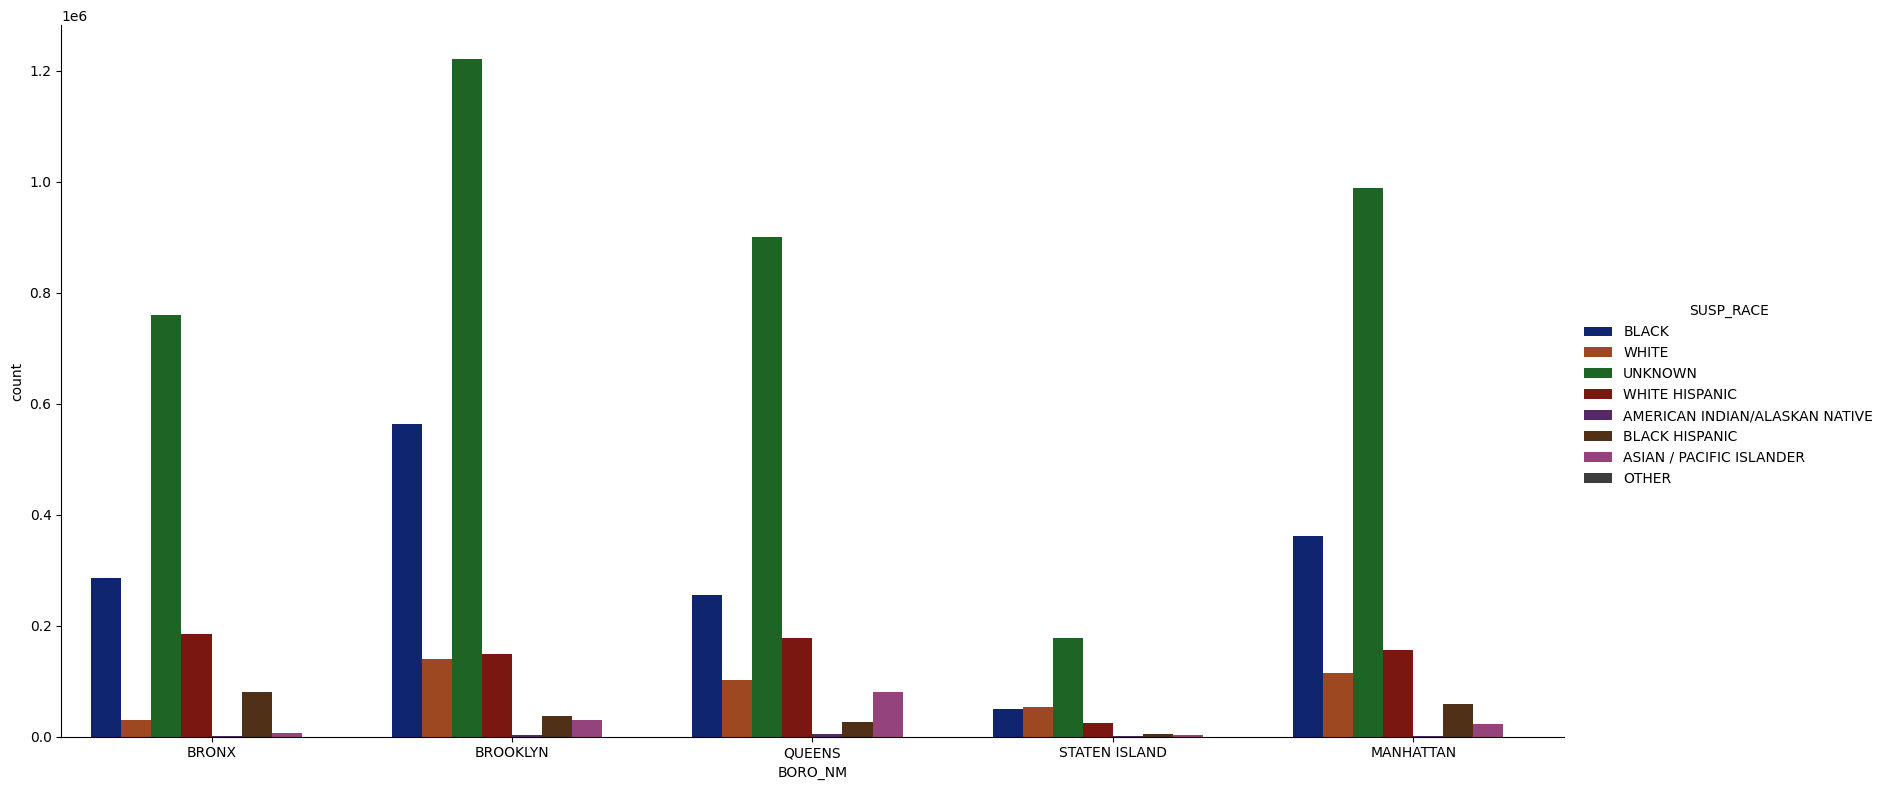

In [144]:
#Number of Suspects by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",palette="dark", data=data, height=8, aspect = 2)

<Figure size 1600x800 with 0 Axes>

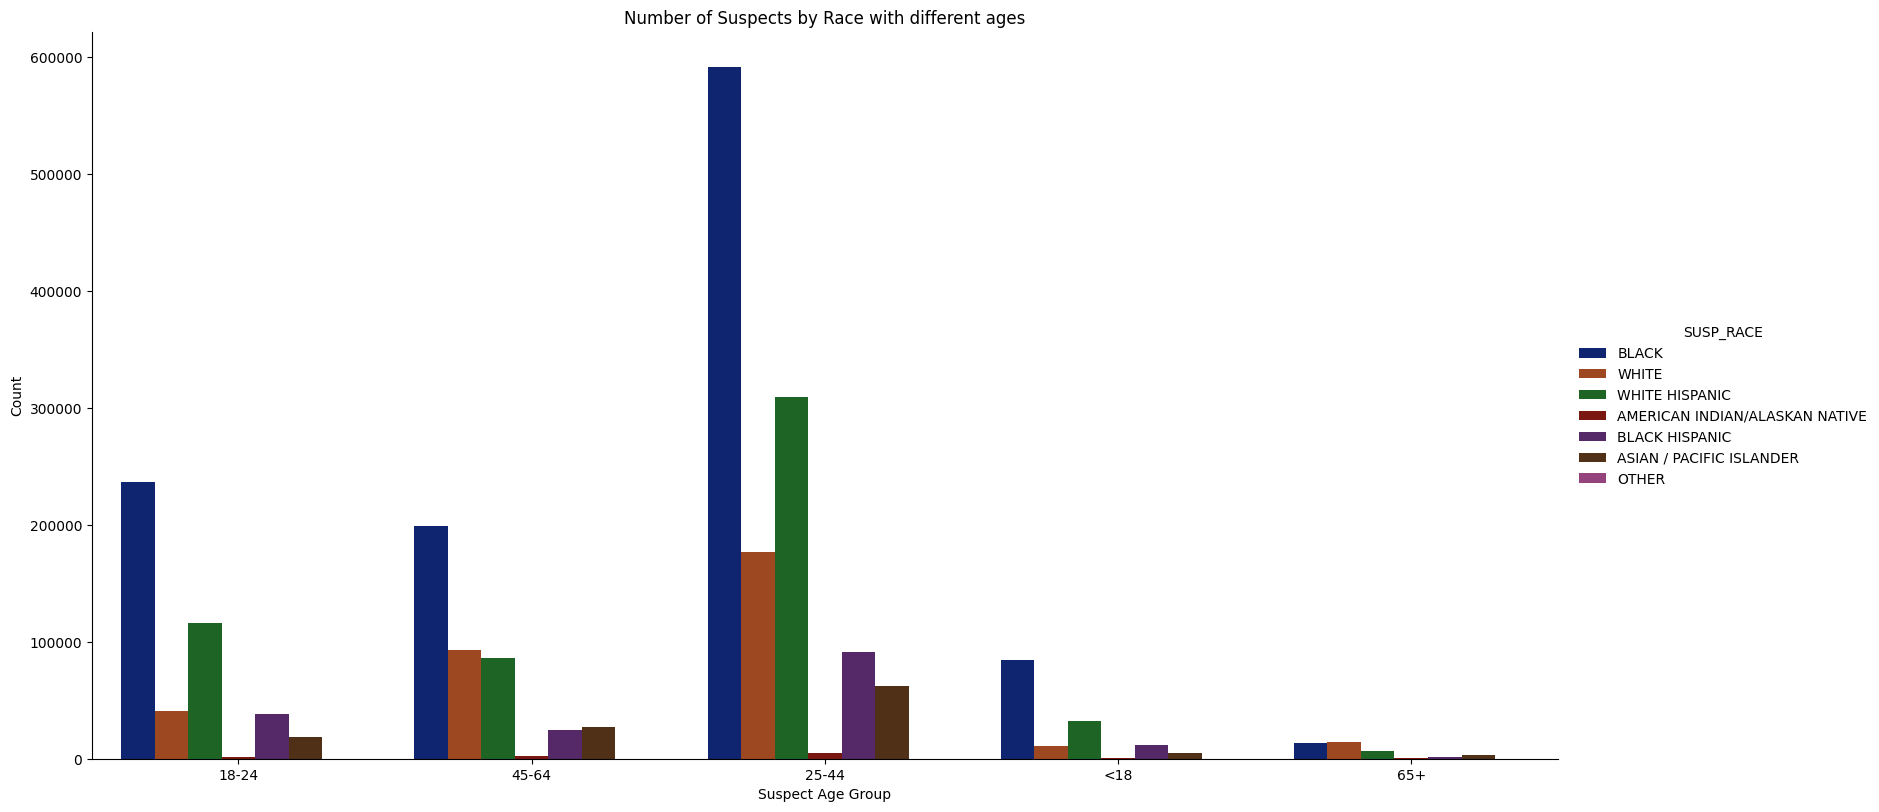

In [145]:
# Filter out rows with SUSP_AGE_GROUP == 'UNKNOWN' or SUSP_RACE == 'UNKNOWN'
filtered_data = data[(data['SUSP_AGE_GROUP'] != 'UNKNOWN') & (data['SUSP_RACE'] != 'UNKNOWN')]

# Number of suspects by Race in the different boroughs
plt.figure(figsize=(16, 8))
ax = sns.catplot(x="SUSP_AGE_GROUP", hue="SUSP_RACE", kind="count", palette="dark", data=filtered_data, height=8, aspect=2)

# Set plot labels and title
ax.set_axis_labels("Suspect Age Group", "Count")
ax.set(title="Number of Suspects by Race with different ages")

# Show the plot
plt.show()

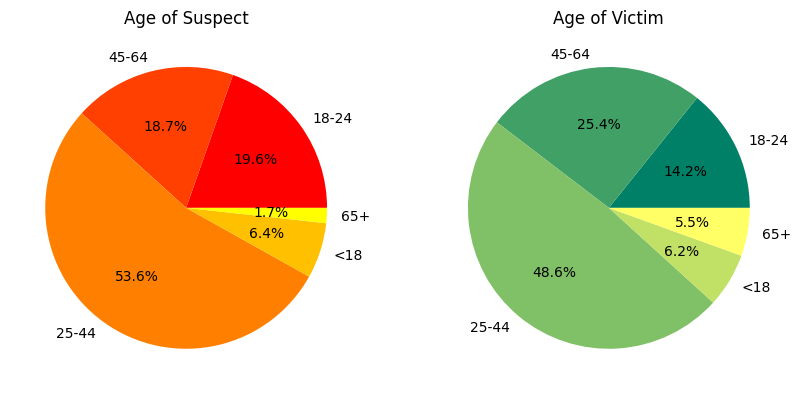

In [146]:
filtered_data_susp = data[data['SUSP_AGE_GROUP'] != 'UNKNOWN']
filtered_data_vic = data[data['VIC_AGE_GROUP'] != 'UNKNOWN']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Age of suspect
filtered_data_susp['SUSP_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Suspect',
                                                                   colormap='autumn', autopct='%1.1f%%', ylabel='', ax=axs[0])

# Plot for Age of victim
filtered_data_vic['VIC_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Victim',
                                                                 colormap='summer', autopct='%1.1f%%', ylabel='', ax=axs[1])

plt.show()

### Crimes data

Text(0.5, 1.0, 'crime success rate')

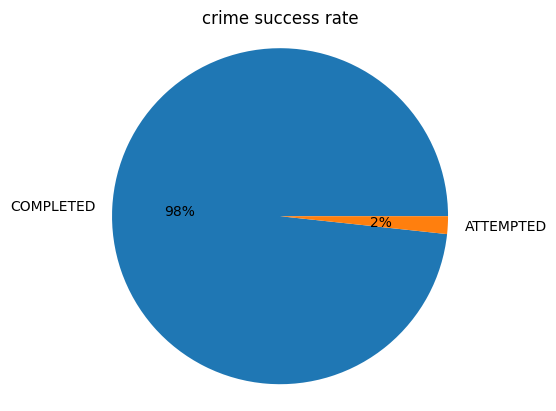

In [147]:
# Successful crime rate
plt.pie(data['COMPLETED'].value_counts(normalize=True).round(4),labels=data['COMPLETED'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

array([<Axes: ylabel='count'>], dtype=object)

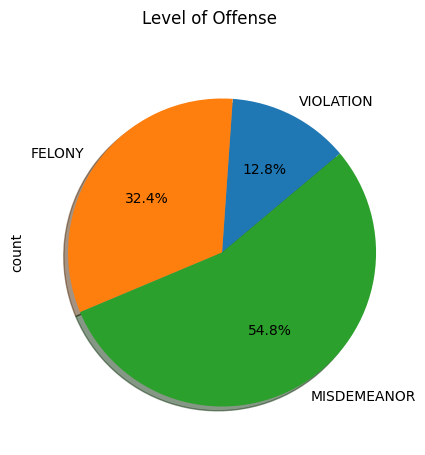

In [148]:
data['CRIME_CLASS'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

C:\Users\MSI\AppData\Local\Temp\ipykernel_12620\3863479351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")


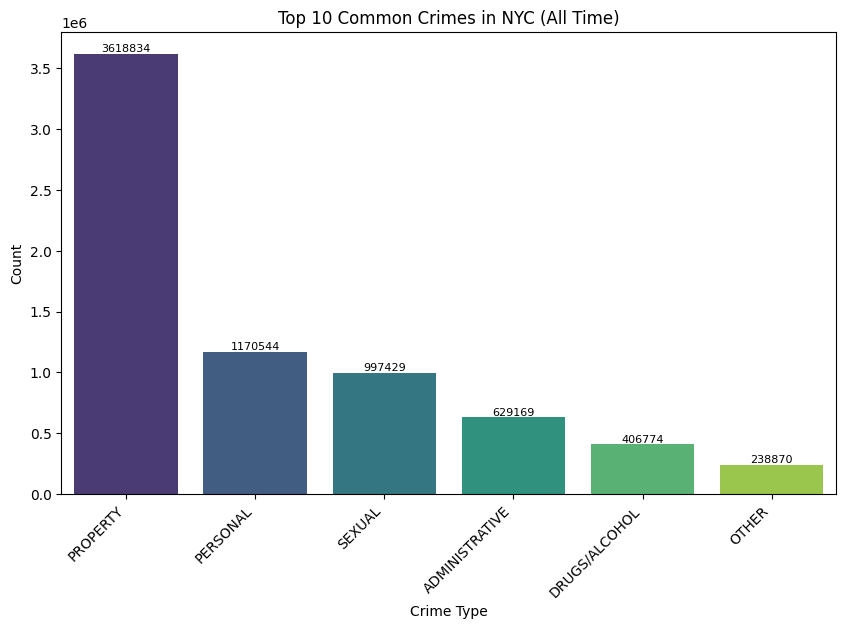

In [149]:
# Get the top 10 common crimes
top_crimes = data['OFNS_DESC'].value_counts()[:10]

# Plotting with Seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Common Crimes in NYC (All Time)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding count values on top of each bar
for i, value in enumerate(top_crimes.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

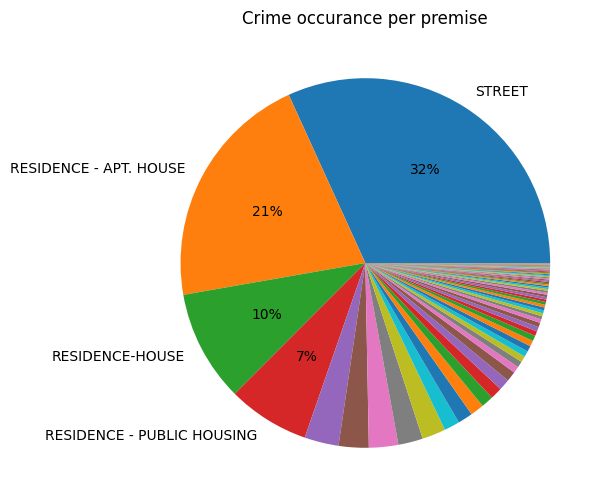

In [150]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=data['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

In [151]:
#Creation of Heatmap

# Combine Latitude and Longitude into positions
positions = list(zip(data['Latitude'], data['Longitude']))

# Choose the map tiles (e.g., 'Stamen Terrain')
tiles = 'Stamen Terrain'

# Create a Folium Map with attribution
heatmap_map = folium.Map(
    location=[40.75, -73.98],
    zoom_start=10,
    control_scale=True  # This adds a scale to the map
)

# Add a base map layer
TileLayer(tiles=tiles, attr="Map data © Stamen Design, OpenStreetMap contributors").add_to(heatmap_map)

# Sample a subset of positions (e.g., 22,000 points)
sampled_positions = sample(positions, 22000)

# Add HeatMap layer to the Folium Map
HeatMap(sampled_positions, radius=8).add_to(heatmap_map)

# Display the Folium Map
heatmap_map

Text(0.5, 1.0, 'Crimes per month')

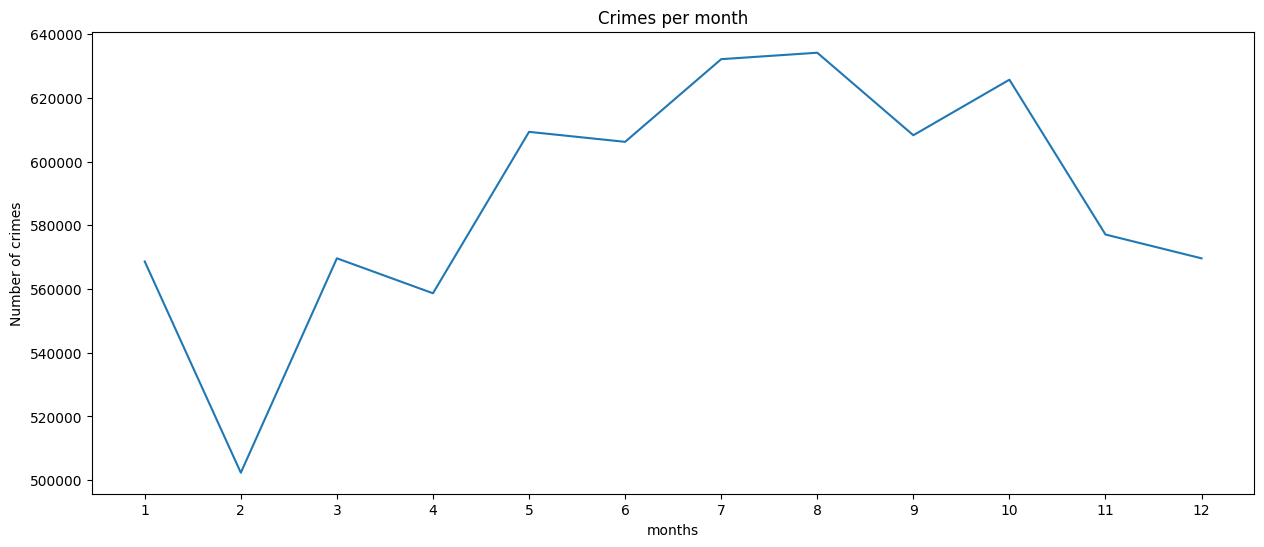

In [152]:
# Crime distribution per month
fig= plt.figure(figsize=(15,6))
data.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

Text(0.5, 1.0, 'Crimes per week days')

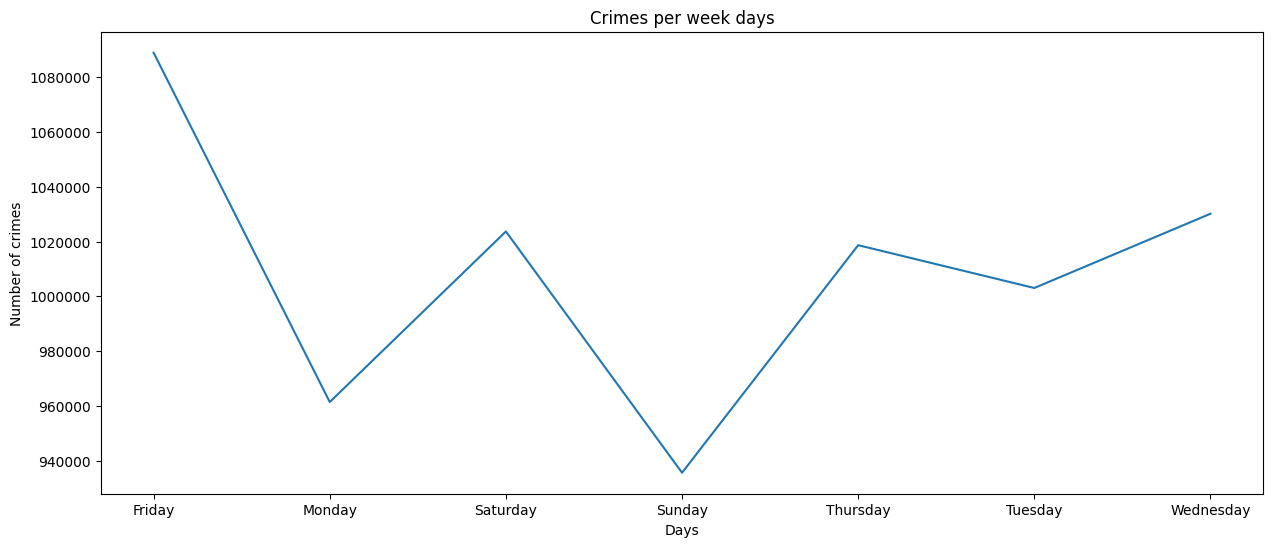

In [153]:
# Crime distribution per week days
fig= plt.figure(figsize=(15,6))
data.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

Text(0.5, 1.0, 'Crimes per hour')

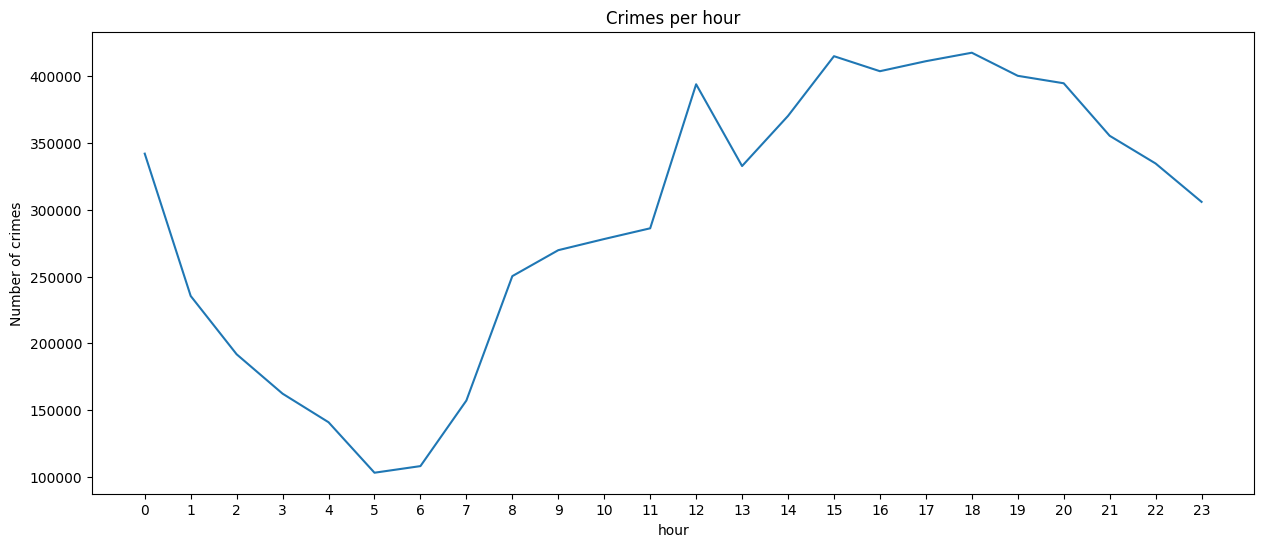

In [154]:
# Crime distribution per hour
fig= plt.figure(figsize=(15,6))
data.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

Text(0.5, 1.0, 'Crime evolution')

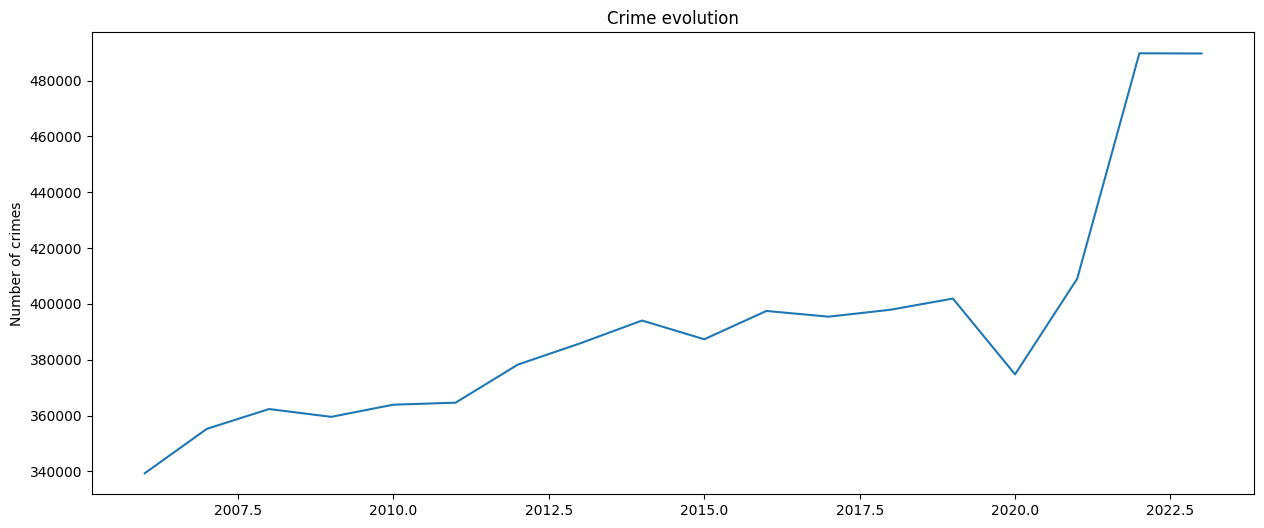

In [155]:
# Crime distribution per year
fig= plt.figure(figsize=(15,6))
temp_df = data[data["year"]>2005]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution')

### Saving to csv

In [156]:
data.to_csv('cleaned_data.csv', index=False)